# Suppose you are appointed as a Data scientist in any Pharma Company. That company makes medicine for heart disease. Your senior manager has given several clinical parameters about a patient, can you predict whether or not the patient has heart disease?

## There are following thirteens clinical parameters of the patient.

## 1. age - age in years

## 2. sex - (1 = male; 0 = female)

## 3. cp - chest pain type
####          ->  0: Typical angina: chest pain related decrease blood supply to the heart
####          ->  1: Atypical angina: chest pain not related to heart
####          ->  2: Non-anginal pain: typically esophageal spasms (non heart related)
####          ->  3: Asymptomatic: chest pain not showing signs of disease

## 4. trtbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

## 5. chol - serum cholestoral in mg/dl
####          -> serum = LDL + HDL + .2 * triglycerides 
####          -> above 200 is cause for concern
## 6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

####          -> &#39;&gt;126&#39; mg/dL signals diabetes

## 7. restecg - resting electrocardiographic results
####           ->  0: Nothing to note
####           ->  1: ST-T Wave abnormality
####                      **** 1. can range from mild symptoms to severe problems
####                      **** 2. signals non-normal heart beat
####            -> 2: Possible or definite left ventricular hypertrophy
####                      **** 1. Enlarged heart&#39;s main pumping chamber

## 8. thalachh - maximum heart rate achieved

## 9. exng - exercise induced angina (1 = yes; 0 = no)

## 10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

## 11. slp - the slope of the peak exercise ST segment
####              ->  0: Upsloping: better heart rate with excercise (uncommon)
####              ->  1: Flatsloping: minimal change (typical healthy heart)
####              ->  2: Downslopins: signs of unhealthy heart

## 12. caa - number of major vessels (0-3) colored by flourosopy
####                -> colored vessel means the doctor can see the blood passing through
####                -> the more blood movement the better (no clots)

## 13. thall - thalium stress result
####                 -> 1,3: normal
####                 -> 6: fixed defect: used to be defect but ok now
####                 -> 7: reversable defect: no proper blood movement when excercising

## 14. output - have disease or not (1=yes, 0=no) (= the predicted attribute)

## When you working on the health of patients then accuracy is deciding factor, Apply different machine learning algorithms and check the accuracy about predicting whether or not the patient has heart disease.

## Apply all five different machine learning models Logistic Regression, K-Nearest Neighbours Classifier, Support Vector machine, Decision Tree Classifier, Random Forest Classifier on the given dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# data preprocessing

features = list(set(data.columns) - set(['output']))
target = list(['output'])
print(features,'\n\n',target)

['age', 'chol', 'restecg', 'sex', 'slp', 'caa', 'thalachh', 'exng', 'trtbps', 'cp', 'oldpeak', 'thall', 'fbs'] 

 ['output']


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

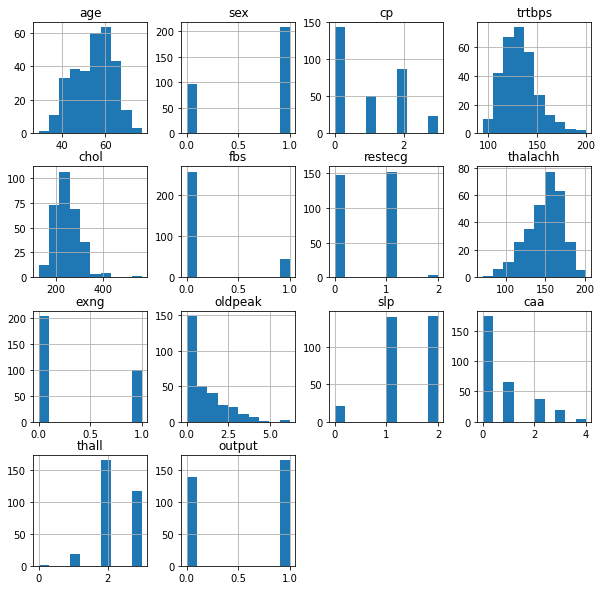

In [9]:
data.hist(figsize=(10,10))

In [12]:
data_corr = data.corr()
data_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


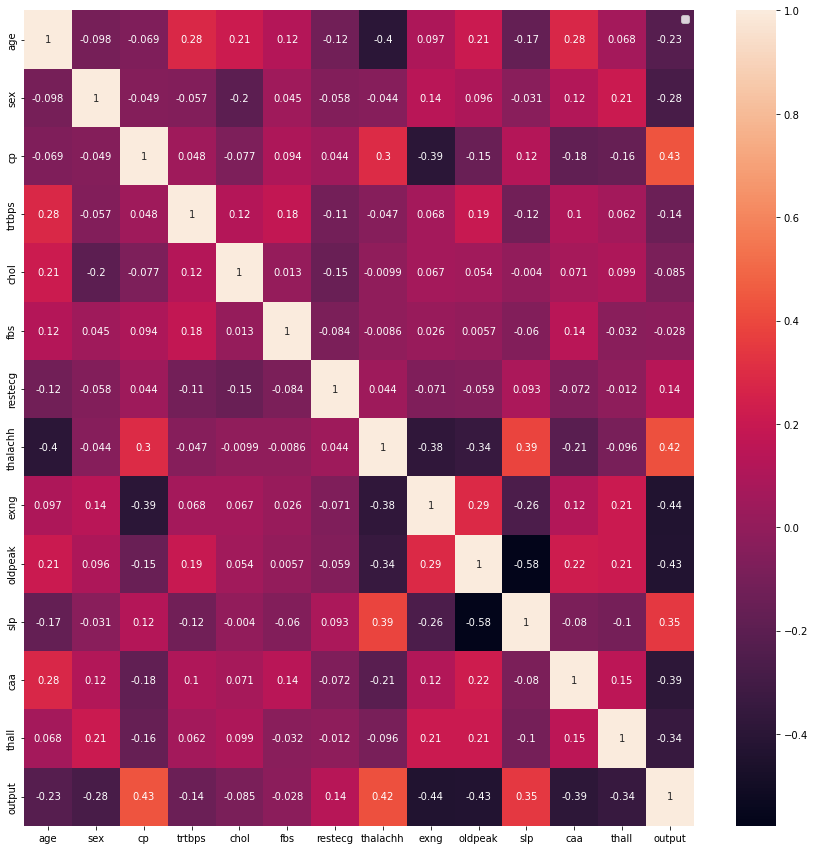

In [14]:
plt.figure(figsize = (15,15))
sns.heatmap(data_corr, annot = True)
plt.show()

In [27]:
# initializing data in x & y

x = data[features].values
y = data[target].values


# Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
# data splitting

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 3)

# data scaling

scaler = StandardScaler()

scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# logistic regression

logistic = LogisticRegression()

logistic.fit(train_x, train_y)

prediction = logistic.predict(test_x)

# confusion matrix

con_mat = confusion_matrix(prediction, test_y)
print('*********  Confusion Matrix  *********\n', con_mat)

# accuracy 

acc_sc = accuracy_score(prediction, test_y)
print('\n Accuracy Score : ', acc_sc)

*********  Confusion Matrix  *********
 [[29  2]
 [ 9 51]]

 Accuracy Score :  0.8791208791208791


C:\Users\Lucifer.LAPTOP-19ER5RAR\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K-Nearest Neighbours Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# data scaling code is already defined in logistic regression algorithm part

In [65]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 6)

# fitting values of x & y

KNN_classifier.fit(train_x, train_y.ravel())

# prediction

prediction_knn = KNN_classifier.predict(test_x) 

# confusion matrix

cm_knn = confusion_matrix(test_y, prediction_knn)
print('*********  Confusion Matrix  *********\n', cm_knn)

# accuracy

as_knn = accuracy_score(test_y, prediction_knn)
print('\n Accuracy Score : ', as_knn)

*********  Confusion Matrix  *********
 [[29  9]
 [ 4 49]]

 Accuracy Score :  0.8571428571428571


# Support Vector machine

In [81]:
from sklearn.svm import SVC

In [ ]:
# data scaling code is already defined in logistic regression algorithm part

In [83]:
svm =  SVC(kernel = 'linear')
svm.fit(train_x, train_y)

svm_pred = svm.predict(test_x)

# confusion matrix

cm_svm = confusion_matrix(test_y, svm_pred)
print('*********  Confusion Matrix  *********\n', cm_svm)

# accuracy

as_svm = accuracy_score(test_y, svm_pred)
print('\n Accuracy Score : ', as_svm)

*********  Confusion Matrix  *********
 [[30  8]
 [ 2 51]]

 Accuracy Score :  0.8901098901098901


C:\Users\Lucifer.LAPTOP-19ER5RAR\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# data scaling code is already defined in logistic regression algorithm part

In [104]:
dtc = DecisionTreeClassifier(random_state = 5)
dtc.fit(train_x, train_y)

dtc_pred = dtc.predict(test_x)

# confusion matrix

cm_dtc = confusion_matrix(test_y, dtc_pred)
print('*********  Confusion Matrix  *********\n', cm_dtc)

# accuracy

as_dtc = accuracy_score(test_y, dtc_pred)
print('\n Accuracy Score : ', as_dtc)

*********  Confusion Matrix  *********
 [[29  9]
 [13 40]]

 Accuracy Score :  0.7582417582417582


# Random Forest Classifier

In [69]:
from sklearn.metrics import mean_squared_error
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# data scaling code is already defined in logistic regression algorithm part

In [80]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 3)
rf.fit(train_x, train_y.ravel())

# prediction

rf_prediction = rf.predict(test_x) 

# confusion matrix

cm_rf = confusion_matrix(test_y, rf_prediction)
print('*********  Confusion Matrix  *********\n', cm_rf)

# accuracy

as_rf = accuracy_score(test_y, rf_prediction)
print('\n Accuracy Score : ', as_rf)

*********  Confusion Matrix  *********
 [[27 11]
 [ 2 51]]

 Accuracy Score :  0.8571428571428571


### Accuracy using Logistic Regression : 87.9 %
### Accuracy using K- Nearest Neighbors Classifier : 85.7 %
### Accuracy using Support Vector Machine : 89 %
### Accuracy using Decision Tree Classifier : 75.8 %
### Accuracy using Random Forest Classifier : 85.7 %

# Therefore from the above models accuracy percent, the chance of getting heart disease is more